In [2]:
'''
IMPORT MODULES
'''
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.models import load_model

import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

import random

from IPython.core.display import HTML

Using TensorFlow backend.


# Create a canvas to write a digit
1. Write a digit and push "Save image to variable".
2. Strings that are written on base64 are used on Python.

In [4]:
HTML('''
<canvas id="canvas" height="300px" width="300px" style="border: 1px solid;"></canvas>
<p>
    <button id="clear">Clear</button>
    <button id="submit">Save image to variable</button>
</p>
<p id="msg"></p>
<script>
    var kernel = IPython.notebook.kernel;

    var config = {
        "linesize": 7,
        "linecolor": "#000000"
    }

    var mouse = {
        "X": null,
        "Y": null,
    }

    var clear = document.getElementById("clear");
    var submit = document.getElementById("submit");
    var canvas = document.getElementById("canvas");
    var ctx = canvas.getContext("2d");

    clear.addEventListener("click", function(){
        ctx.clearRect(0, 0, canvas.width, canvas.height);
    });

    submit.addEventListener("click", function(){
        var variable_value = 'base64_img';
        kernel.execute(variable_value + " = '" + canvas.toDataURL() + "'");
        msg.textContent = "Success: " + "image -> " + variable_value;
    });

    canvas.addEventListener("mouseup", drawEnd, false);
    canvas.addEventListener("mouseout", drawEnd, false);
    
    canvas.addEventListener("mousemove", function(e){
        if (e.buttons === 1 || e.witch === 1) {
            var rect = e.target.getBoundingClientRect();
            var X = e.clientX - rect.left;
            var Y = e.clientY - rect.top;
            draw(X, Y);
        };
    });
 
    canvas.addEventListener("mousedown", function(e){
        if (e.button === 0) {
            var rect = e.target.getBoundingClientRect();
            var X = e.clientX - rect.left;
            var Y = e.clientY - rect.top;
            draw(X, Y);
        }
    });

    function draw(X, Y) {
        ctx.beginPath();
        if (mouse.X === null) {
            ctx.moveTo(X, Y);
        } else {
            ctx.moveTo(mouse.X, mouse.Y);
        }
        ctx.lineTo(X, Y);
        
        ctx.lineCap = "round";
        ctx.lineWidth = config.linesize * 2;
        ctx.strokeStyle = config.linecolor;
        ctx.stroke();

        mouse.X = X;
        mouse.Y = Y;
    };
 
    function drawEnd() {
        mouse.X = null;
        mouse.Y = null;
    }
</script>
''')

# To use on Python
Base64 strings are used on Python.  
Python codes split base64 strings and create image by it.   

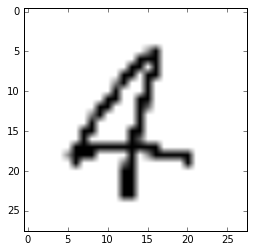

I think this digit is a  4


In [5]:
import base64
import numpy as np
from io import BytesIO
from PIL import Image
from PIL import ImageOps
import matplotlib.pyplot as plt


def CreateMnistDataArray(image):
    ret = np.zeros(28*28).reshape((1,28,28,1))
    width, height = image.size
    for y in range(height):
        
        for x in range(width):
            r, g, b,a = image.getpixel((x, y))
            if a == 0:
                ret[0][y][x][0] = 0.0
            else:
                ret[0][y][x][0] = 1.0
                
    return ret
            

base64_img = base64_img.split(",")[-1]

img = Image.open(BytesIO(base64.b64decode(base64_img))).resize((28,28))

plt.imshow(np.asarray(img))
plt.show()

#print(type(img))  # <class 'PIL.PngImagePlugin.PngImageFile'>
#print(img.size)   # (320, 240) 
#print(img.mode)   # RGBA

mnist_type_data = CreateMnistDataArray(img)

'''
LOAD MODEL AND PREDICT
'''
model = load_model('model_mnist_cnn.h5')

ret = model.predict(mnist_type_data, batch_size=1)   # OK
#print("predict ret:", ret)

bestnum = 0.0
bestclass = 0
for n in [0,1,2,3,4,5,6,7,8,9]:
    if bestnum < ret[0][n]:
        bestnum = ret[0][n]
        bestclass = n

print("I think this digit is a ", bestclass)
